In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("C:/Users/user/Downloads/online_retail.csv",encoding='unicode_escape')

In [8]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


In [9]:
df.shape

(541909, 8)

In [10]:
(df.isnull().sum()/df.shape[0])*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [11]:
df.dropna(subset=["CustomerID"],inplace=True)

In [12]:
df.shape

(406829, 8)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(401604, 8)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [16]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [17]:
df = df[df['Quantity']>0]

In [18]:
df["Date"] = pd.to_datetime(df["InvoiceDate"])

In [19]:
reference_date = max(df["Date"]) + pd.DateOffset(days=1)

In [20]:
recency = (reference_date - df.groupby('CustomerID')["Date"].max()).dt.days
recency.name = "Recency"
recency.head(2)

CustomerID
12346.0    326
12347.0      2
Name: Recency, dtype: int64

In [21]:
freq = df.groupby('CustomerID')['Date'].count()
freq.name = "Freq"
freq.head(2)

CustomerID
12346.0      1
12347.0    182
Name: Freq, dtype: int64

In [22]:
df["Total_Price"] = df["Quantity"]*df["UnitPrice"]
monetary = df.groupby('CustomerID')['Total_Price'].sum()
monetary.name = "Monetary"
monetary.head(2)

CustomerID
12346.0    77183.6
12347.0     4310.0
Name: Monetary, dtype: float64

In [23]:
recency_df = recency.reset_index()
recency_df.columns = ['CustomerID', 'Recency']

frequency_df = freq.reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']

monetary_df = monetary.reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']

rfm = recency_df.merge(frequency_df, on="CustomerID").merge(monetary_df, on="CustomerID")

In [24]:
rfm.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24


In [25]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4339 non-null   float64
 1   Recency     4339 non-null   int64  
 2   Frequency   4339 non-null   int64  
 3   Monetary    4339 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 135.7 KB


In [26]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,92.518322,90.512100,2048.215924
std,1721.889758,100.009747,225.515328,8984.248352
min,12346.000000,1.000000,1.000000,0.000000
25%,13812.500000,18.000000,17.000000,306.455000
50%,15299.000000,51.000000,41.000000,668.560000
75%,16778.500000,142.000000,98.000000,1660.315000
max,18287.000000,374.000000,7676.000000,280206.020000


In [27]:
rfm['Recency_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['Frequency_Score'] = pd.qcut(rfm['Frequency'], 5, labels=[1, 2, 3, 4, 5])
rfm['Monetary_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [28]:
rfm['Recency_Score']=rfm['Recency_Score'].astype(int)
rfm['Frequency_Score']=rfm['Frequency_Score'].astype(int)
rfm['Monetary_Score']=rfm['Monetary_Score'].astype(int)

In [29]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       4339 non-null   float64
 1   Recency          4339 non-null   int64  
 2   Frequency        4339 non-null   int64  
 3   Monetary         4339 non-null   float64
 4   Recency_Score    4339 non-null   int32  
 5   Frequency_Score  4339 non-null   int32  
 6   Monetary_Score   4339 non-null   int32  
dtypes: float64(2), int32(3), int64(2)
memory usage: 186.6 KB


In [30]:
rfm.head(5)

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
0,12346.0,326,1,77183.60,1,1,5
1,12347.0,2,182,4310.00,5,5,5
2,12348.0,75,31,1797.24,2,3,4
3,12349.0,19,73,1757.55,4,4,4
4,12350.0,310,17,334.40,1,2,2


In [31]:
rfm["log_Recency"]=np.log1p(rfm["Recency"])
rfm["log_Frequency"]=np.log1p(rfm["Frequency"])
rfm["log_Monetary"]=np.log1p(rfm["Monetary"])

In [32]:
from sklearn.cluster import KMeans

In [33]:
inertia = []
X = rfm[["Recency_Score","Frequency_Score","Monetary_Score"]]
for i in range(2,13):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

In [34]:
inertia = []
X = rfm[["Recency_Score","Frequency_Score","Monetary_Score"]]
for i in range(2,13):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

In [35]:
kmeans = KMeans(n_clusters=4,random_state=14)
kmeans.fit(X)
pred = kmeans.predict(X)
rfm["Clusters"] = pred

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [36]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,log_Recency,log_Frequency,log_Monetary,Clusters
0,12346.0,326,1,77183.60,1,1,5,5.789960,0.693147,11.253955,0
1,12347.0,2,182,4310.00,5,5,5,1.098612,5.209486,8.368925,1
2,12348.0,75,31,1797.24,2,3,4,4.330733,3.465736,7.494564,0
3,12349.0,19,73,1757.55,4,4,4,2.995732,4.304065,7.472245,1
4,12350.0,310,17,334.40,1,2,2,5.739793,2.890372,5.815324,3


In [37]:
rfm["Clusters"].value_counts()

Clusters
1    1310
3    1141
2     987
0     901
Name: count, dtype: int64

In [38]:
clusters = rfm[["Clusters","Recency_Score","Frequency_Score","Monetary_Score"]]
avg_clusters=clusters.groupby("Clusters").mean()

In [39]:
avg_clusters

,Recency_Score,Frequency_Score,Monetary_Score
Clusters,,,
0,2.189789,3.537181,3.584906
1,4.366412,4.500000,4.478626
2,3.862209,2.052685,2.007092
3,1.384750,1.582822,1.699387


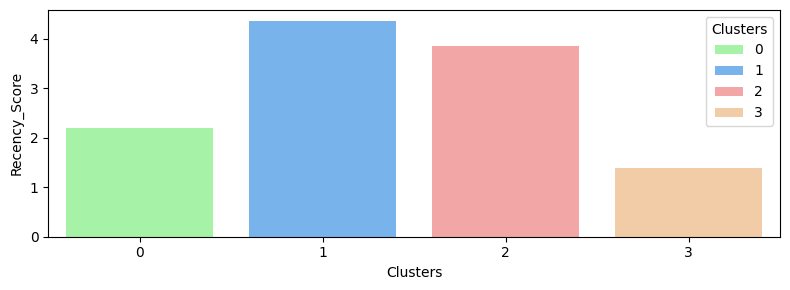

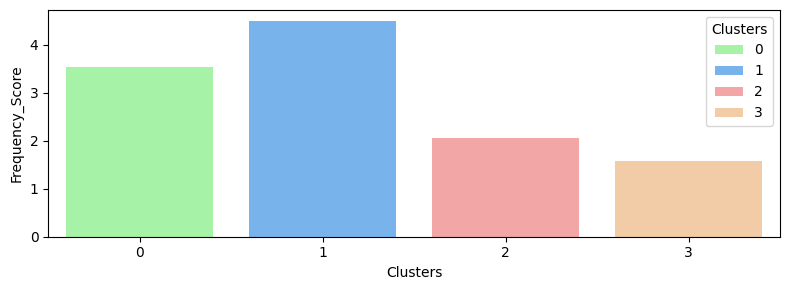

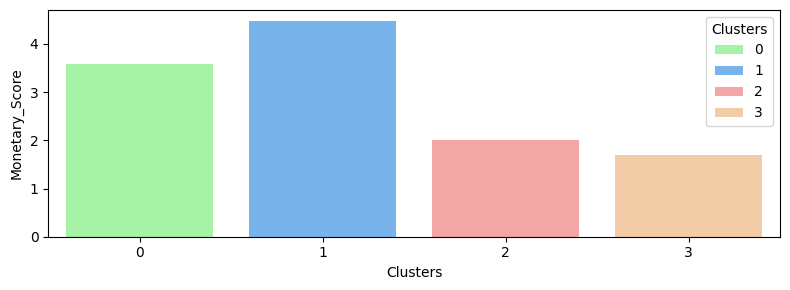

In [40]:
lst = ["Recency_Score","Frequency_Score","Monetary_Score"]
colors = ['#99ff99', '#66b3ff', '#ff9999', '#ffcc99']
for i in range(3):
  plt.figure(figsize=(8,3))
  sns.barplot(data=avg_clusters,x='Clusters',y=lst[i],hue='Clusters',palette=colors)
  plt.tight_layout()
  plt.show()

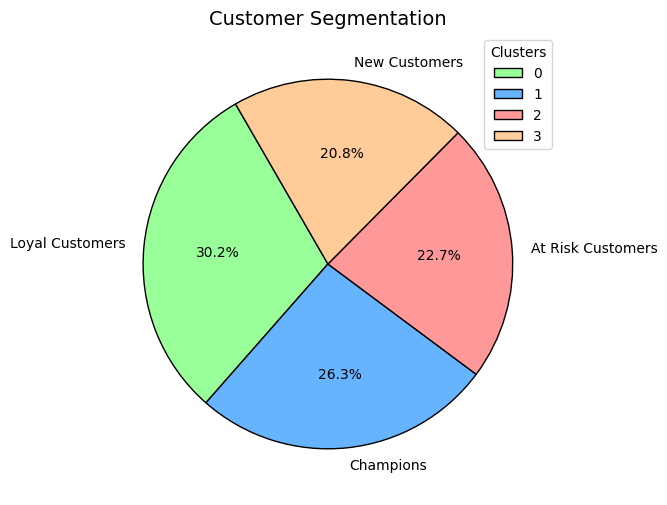

In [41]:
customers = rfm.shape[0]
labels = ['Loyal Customers','Champions','At Risk Customers','New Customers']
sizes = (rfm["Clusters"].value_counts()/customers)*100
colors = ['#99ff99', '#66b3ff', '#ff9999', '#ffcc99']
plt.figure(figsize=(8, 6))
plt.pie(
    sizes, labels=labels, colors=colors, autopct='%1.1f%%',
    startangle=120, wedgeprops={'edgecolor': 'black'}
)
plt.title('Customer Segmentation', fontsize=14)
plt.legend([0,1,2,3],title='Clusters',loc='best',)
plt.show()

In [42]:
customer_seg.to_csv("customer_segmentation.csv",index=False)

NameError: name 'customer_seg' is not defined

In [ ]:
import joblib
joblib.dump(kmeans,"customer_segmentation_model.pkl")

['customer_segmentation_model.pkl']

In [ ]:
data = pd.DataFrame(data=[[1,2,3]],columns=["Recency_Score","Frequency_Score","Monetary_Score"])
pred = kmeans.predict(data)
print(pred[0])

numpy.int32

In [43]:
import plotly.express as px
label = ['Loyal Customers','Champions','At Risk Customers','New Customers']
fig = px.scatter_3d(rfm, x='log_Recency', y='log_Frequency', z='log_Monetary',
              color='Clusters',labels=label)
fig.show()

In [44]:
rfm.head(2)

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,log_Recency,log_Frequency,log_Monetary,Clusters
0,12346.0,326,1,77183.6,1,1,5,5.789960,0.693147,11.253955,0
1,12347.0,2,182,4310.0,5,5,5,1.098612,5.209486,8.368925,1


In [45]:
df = rfm[['CustomerID','Recency_Score',
       'Frequency_Score', 'Monetary_Score', 'log_Recency', 'log_Frequency',
       'log_Monetary', 'Clusters']]

KeyError: "['Cluster Labels'] not in index"

In [ ]:
df.to_csv("Customer_Segmentation.csv",index=False)

In [ ]:
rfm.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'Recency_Score',
       'Frequency_Score', 'Monetary_Score', 'log_Recency', 'log_Frequency',
       'log_Monetary', 'Clusters', 'Cluster Labels'],
      dtype='object')

In [46]:
pd.read_csv("/content/Customer_Segmentation.csv").head(2)

FileNotFoundError: [Errno 2] No such file or directory: '/content/Customer_Segmentation.csv'